In [900]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("Churn.csv")

dataset=dataset.drop(['customerID'],axis=1)


In [901]:
print(dataset.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [902]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace([' '],'')
dataset[['TotalCharges']] = dataset[['TotalCharges']].apply(pd.to_numeric) 

print(dataset.dtypes)
print(dataset.info)
print(dataset.isnull().sum())


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
<bound method DataFrame.info of       gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0     Female              0     Yes  ...          29.85         29.85    No
1       Male              0      No  ...          56.95       1889.50    No
2       Male              0      No  ...          53.85        108.15   Yes
3       Male              0      No  ...          42.30       1840.75    No
4     Female  

In [903]:
dataset.dropna(inplace=True)

print(dataset.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**EXPLORATORY DATA ANALYSIS:**
Analysing pattern in the Dataset and seeing how different features affect target variable

Target Variable
Churn
No     5163
Yes    1869
Name: Churn, dtype: int64


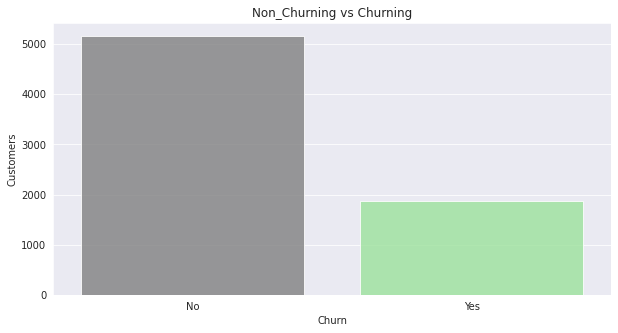

In [904]:
print('Target Variable')
print(dataset.groupby(['Churn']).Churn.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(dataset['Churn'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Non_Churning vs Churning')
plt.ylabel('Customers')
plt.show()


This shows that theres is a **HIGH CLASS IMBALANCE**

<Figure size 432x288 with 0 Axes>

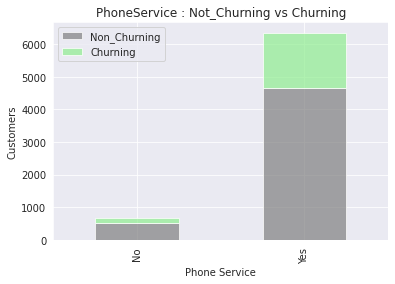

In [905]:
#categorical value analysis

sns.set_style('darkgrid')
plt.figure()
ps = dataset.groupby(['PhoneService','Churn']).PhoneService.count().unstack()
p1 = ps.plot(kind = 'bar', stacked = True, 
                   title = 'PhoneService : Not_Churning vs Churning', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Phone Service')
p1.set_ylabel('Customers')
p1.legend(['Non_Churning','Churning'])
plt.show()

More Customers who had a Phone Service decided to Churn rather than the ones who didn't have one!


<Figure size 432x288 with 0 Axes>

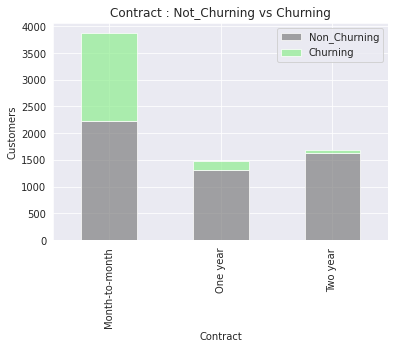

In [906]:
sns.set_style('darkgrid')
plt.figure()
ps = dataset.groupby(['Contract','Churn']).Contract.count().unstack()
p1 = ps.plot(kind = 'bar', stacked = True, 
                   title = 'Contract : Not_Churning vs Churning', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Contract')
p1.set_ylabel('Customers')
p1.legend(['Non_Churning','Churning'])
plt.show()

Most of the people who Churned had a Month to Month Subscription.



<Figure size 432x288 with 0 Axes>

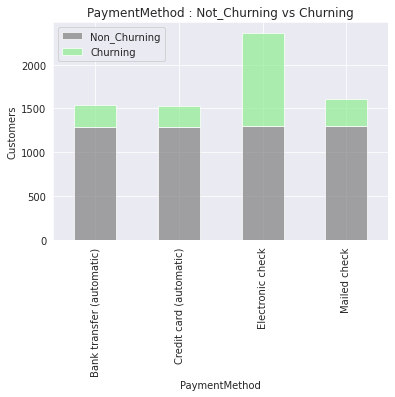

In [907]:
sns.set_style('darkgrid')
plt.figure()
ps = dataset.groupby(['PaymentMethod','Churn']).PaymentMethod.count().unstack()
p1 = ps.plot(kind = 'bar', stacked = True, 
                   title = 'PaymentMethod : Not_Churning vs Churning', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('PaymentMethod')
p1.set_ylabel('Customers')
p1.legend(['Non_Churning','Churning'])
plt.show()

Custoners using Electronic Check were more likely to Churn.

<Figure size 432x288 with 0 Axes>

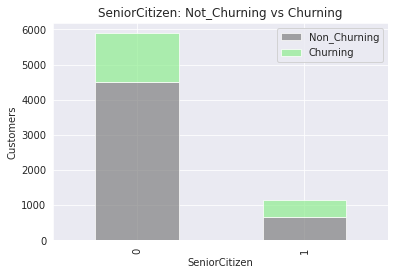

In [908]:
sns.set_style('darkgrid')
plt.figure()
ps = dataset.groupby(['SeniorCitizen','Churn']).SeniorCitizen.count().unstack()
p1 = ps.plot(kind = 'bar', stacked = True, 
                   title = 'SeniorCitizen: Not_Churning vs Churning', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('SeniorCitizen')
p1.set_ylabel('Customers')
p1.legend(['Non_Churning','Churning'])
plt.show()

Younger Citizens, were more likely to Churn.

<Figure size 432x288 with 0 Axes>

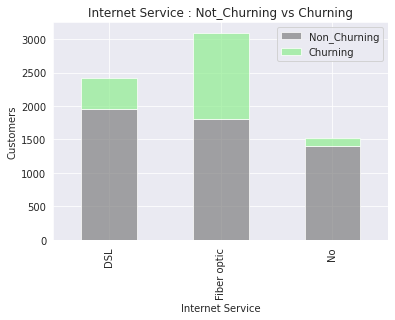

In [909]:
sns.set_style('darkgrid')
plt.figure()
ps = dataset.groupby(['InternetService','Churn']).InternetService.count().unstack()
p1 = ps.plot(kind = 'bar', stacked = True, 
                   title = 'Internet Service : Not_Churning vs Churning', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Internet Service')
p1.set_ylabel('Customers')
p1.legend(['Non_Churning','Churning'])
plt.show()

Most of the Customers who Churned were usig Fibre Optics.
Most Customers who didn't have an Internet Connection didn't Churn.

Text(0.5, 1.0, 'Tenure for the provider')

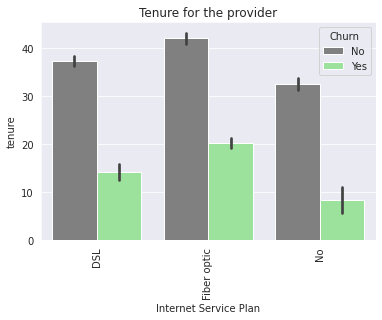

In [910]:
sns.barplot(x='InternetService',y='tenure',hue='Churn',data=dataset,palette= ['grey','lightgreen'])
plt.xlabel('Internet Service Plan')
plt.xticks(rotation=90)
plt.title('Tenure for the provider')

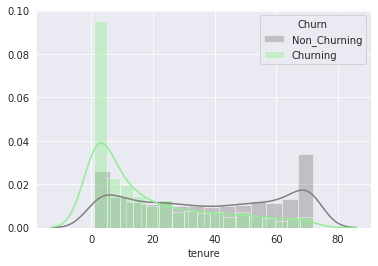

In [911]:
sns.set_style('darkgrid')
churn_yes = dataset[dataset['Churn'] == "Yes"]
churn_no = dataset[dataset['Churn'] == "No"]
sns.distplot(churn_no.tenure,label='Non_Churning',color ='grey')
sns.distplot(churn_yes.tenure,label='Churning',color = 'lightgreen')
plt.legend(title='Churn',loc='best')

Customers with lower tenures overall  are more likely to Churn for all Internet Service.
Some Customers with High Tenures also left.

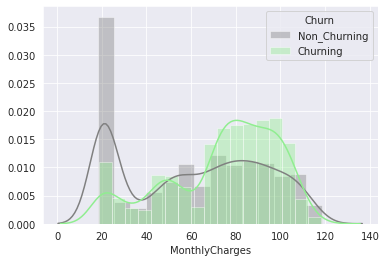

In [912]:
sns.set_style('darkgrid')
churn_yes = dataset[dataset['Churn'] == 'Yes']
churn_no = dataset[dataset['Churn'] == 'No']
sns.distplot(churn_no.MonthlyCharges,label='Non_Churning',color ='grey')
sns.distplot(churn_yes.MonthlyCharges,label='Churning',color = 'lightgreen')
plt.legend(title='Churn',loc='best')

Customers with Monthly Charges greater than 60 and less than 100 were more likely to Churn.
Customers with Less Monthly Charges less than 20 were most likely not to Churn.

In [913]:
categorical= list(dataset.select_dtypes(include=['object']))
dummy=pd.get_dummies(dataset[categorical],drop_first=True)
merged=pd.concat([dataset,dummy],axis='columns')
final=merged.drop(merged[categorical],axis='columns')



Generating a Correlation Heatmap to see which features can be elimiated based on their predictiveness.

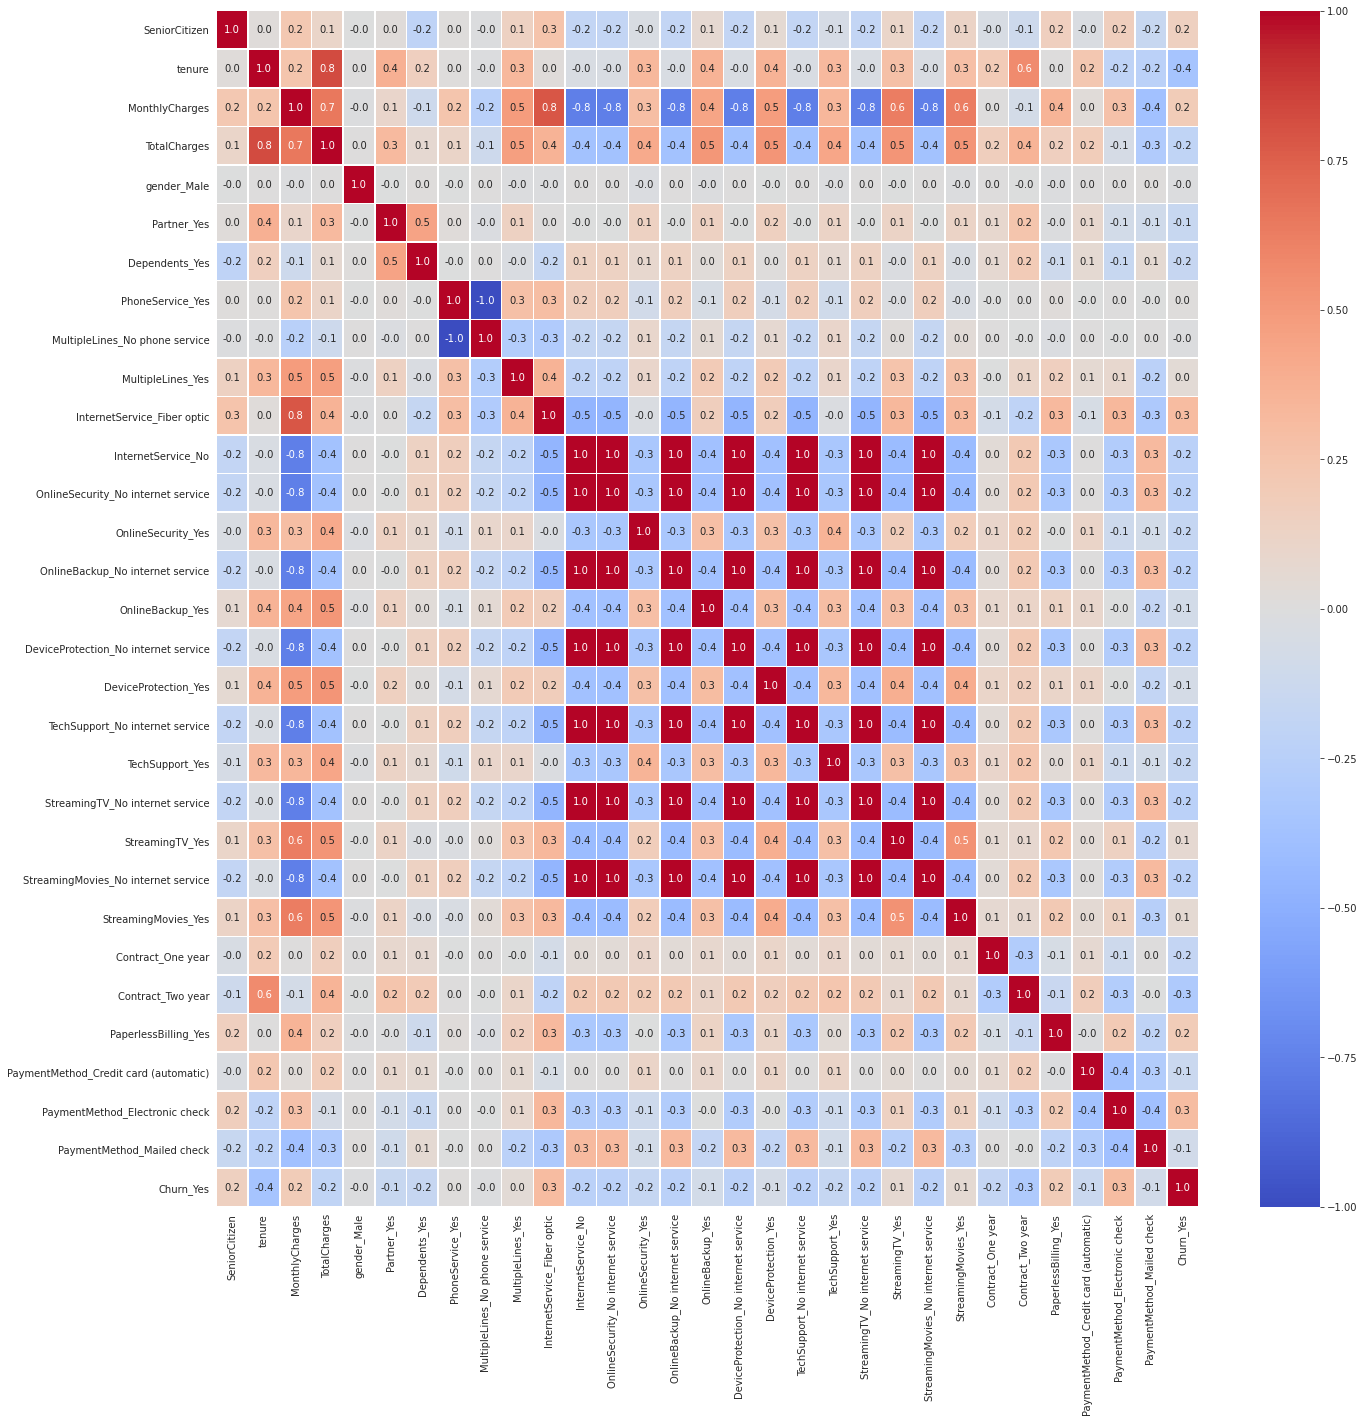

In [914]:
corr = final.corr()
plt.figure(figsize=(22,22))
ax=sns.heatmap(corr,annot=True,linewidth=.5,fmt='0.1f',
               vmin=-1,vmax=1,cmap="coolwarm")

Time to analyze the distribution of the categorical variables and the relationship with the target variable.

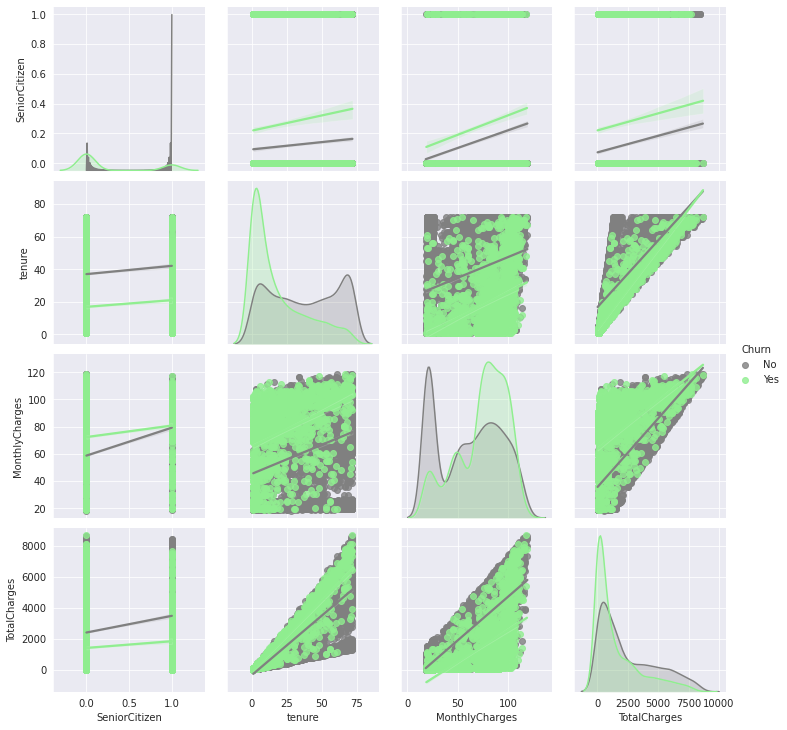

In [915]:
sns.set_style('darkgrid')
sns.pairplot(dataset,hue="Churn",palette= ['grey','lightgreen'],kind='reg')

In [916]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final.iloc[:,:-1], final.iloc[:,-1],stratify=final.iloc[:,-1], test_size = 0.2,random_state = 0)

**FEATURE SELECTION :** Since we have so many features , maybe not all features will be needed to generate a good mode, so we need to remove the features that could negatively impact our model's prediction.

In [917]:
x_train=pd.DataFrame(x_train)
from sklearn.tree import DecisionTreeClassifier
roc_values = []
for feature in x_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(np.array(x_train[feature]).reshape(-1,1), y_train)
    y_scored = clf.predict_proba(x_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [918]:
roc_values = pd.Series(roc_values)
roc_values.index = x_train.columns
roc_values.sort_values(ascending=False)

tenure                                   0.723046
InternetService_Fiber optic              0.689248
PaymentMethod_Electronic check           0.670599
Contract_Two year                        0.661019
PaperlessBilling_Yes                     0.620217
OnlineBackup_No internet service         0.618954
InternetService_No                       0.618954
DeviceProtection_No internet service     0.618954
TechSupport_No internet service          0.618954
StreamingTV_No internet service          0.618954
StreamingMovies_No internet service      0.618954
OnlineSecurity_No internet service       0.618954
MonthlyCharges                           0.601595
OnlineSecurity_Yes                       0.585923
Dependents_Yes                           0.582373
PaymentMethod_Credit card (automatic)    0.568753
TechSupport_Yes                          0.568681
Partner_Yes                              0.564874
SeniorCitizen                            0.562837
Contract_One year                        0.561953


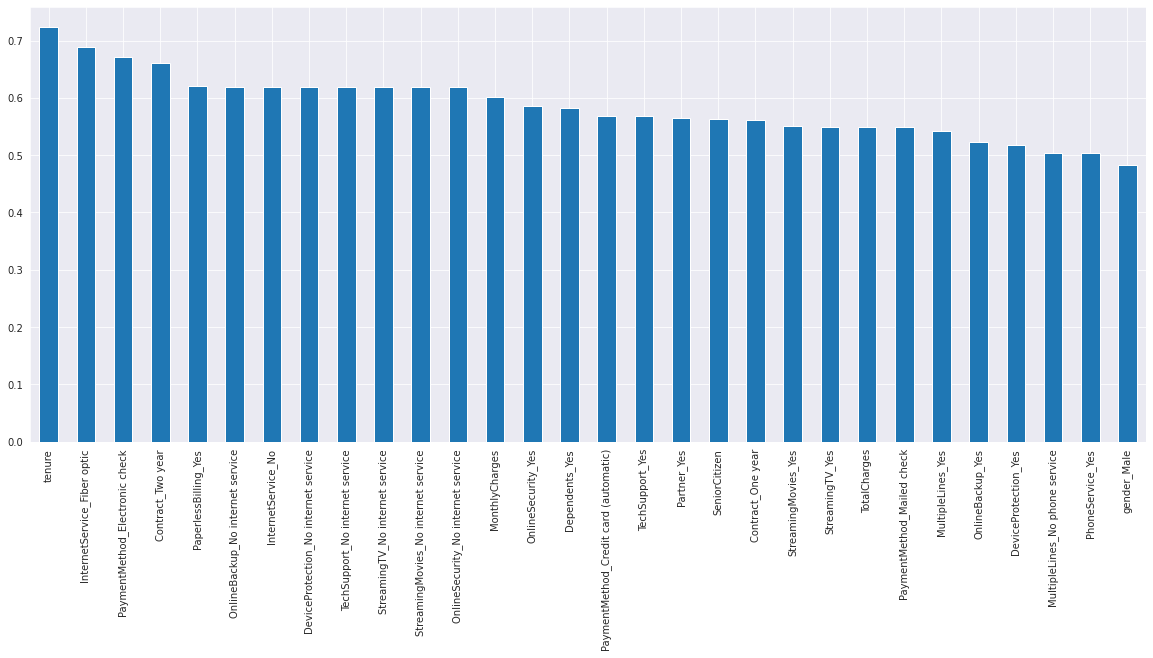

In [919]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Since, 'Gender' shows a ROC value of 0.48 and is less than 0.5, we won't use it for building our model

**MODEL BUILDING :** Now we will train our model

In [920]:
x_train.drop(['gender_Male'],axis=1,inplace=True)
x_test.drop(['gender_Male'],axis=1,inplace=True)

features=list(x_train.columns)
target=("0","1")

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**K Nearest Neighbours**

In [921]:
#creating KNN Model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=21,p=2)

classifier_knn.fit(x_train,y_train)
y_pred_knn=classifier_knn.predict(x_test)
y_trpr_knn=classifier_knn.predict(x_train)

#checking accuracy
from sklearn.metrics import accuracy_score
print("TRAIN SET ACCURACY =",accuracy_score(y_train, y_trpr_knn))
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_knn))

TRAIN SET ACCURACY = 0.8049777777777778
TEST SET ACCURACY = 0.7874911158493249


_________________TRAIN SET KNN__________________


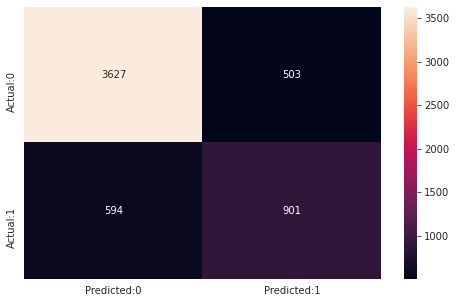

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4130
           1       0.64      0.60      0.62      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.74      0.75      5625
weighted avg       0.80      0.80      0.80      5625

_________________TEST SET KNN__________________


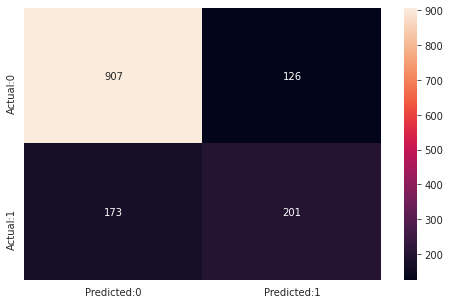

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [922]:
from sklearn.metrics import classification_report, confusion_matrix
print("_________________TRAIN SET KNN__________________")
cm=confusion_matrix(y_train, y_trpr_knn)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_train,y_trpr_knn))


print("_________________TEST SET KNN__________________")
cm=confusion_matrix(y_test, y_pred_knn)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_test,y_pred_knn))

**Kernelized : Support Vector Machines**

In [923]:
#training model SVM
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1,random_state = 0,
                 probability=True)

classifier_svc.fit(x_train,y_train)
y_pred_svc=classifier_svc.predict(x_test)
y_trpr_svc=classifier_svc.predict(x_train)

#checking accuracy
from sklearn.metrics import accuracy_score
print("TRAIN SET ACCURACY =",accuracy_score(y_train, y_trpr_svc))
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_svc))

TRAIN SET ACCURACY = 0.7939555555555555
TEST SET ACCURACY = 0.7839374555792467


_________________TRAIN SET SVM__________________


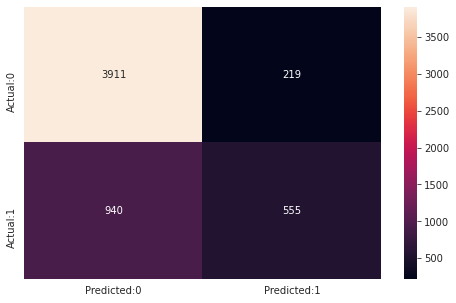

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4130
           1       0.72      0.37      0.49      1495

    accuracy                           0.79      5625
   macro avg       0.76      0.66      0.68      5625
weighted avg       0.78      0.79      0.77      5625

_________________TEST SET SVM__________________


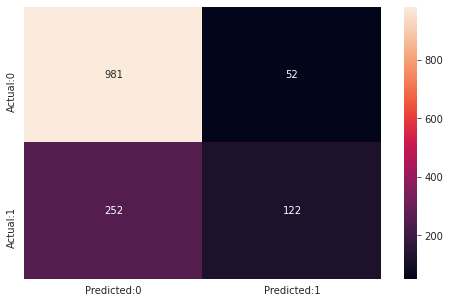

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1033
           1       0.70      0.33      0.45       374

    accuracy                           0.78      1407
   macro avg       0.75      0.64      0.66      1407
weighted avg       0.77      0.78      0.75      1407



In [924]:
print("_________________TRAIN SET SVM__________________")
cm=confusion_matrix(y_train, y_trpr_svc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_train,y_trpr_svc))


print("_________________TEST SET SVM__________________")
cm=confusion_matrix(y_test, y_pred_svc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_test,y_pred_svc))

**Decision Tree**

In [925]:
#creating the Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='gini',max_depth=4)

classifier_dt.fit(x_train,y_train)

y_pred_dt=classifier_dt.predict(x_test)
y_trpr_dt=classifier_dt.predict(x_train)

#checking accuracy
from sklearn.metrics import accuracy_score
print("TRAIN SET ACCURACY =",accuracy_score(y_train, y_trpr_dt))
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_dt))

TRAIN SET ACCURACY = 0.7953777777777777
TEST SET ACCURACY = 0.7860696517412935


_________________TRAIN SET DTree__________________


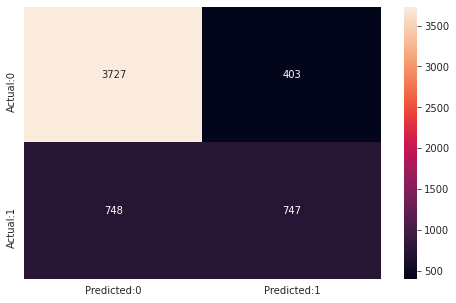

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4130
           1       0.65      0.50      0.56      1495

    accuracy                           0.80      5625
   macro avg       0.74      0.70      0.72      5625
weighted avg       0.78      0.80      0.79      5625

_________________TEST SET DTree__________________


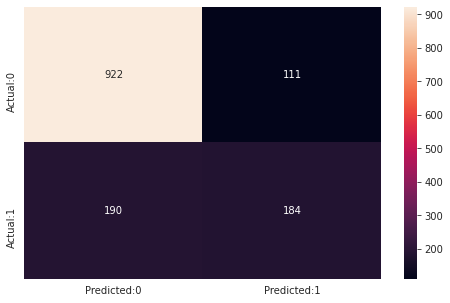

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [926]:
from sklearn.metrics import classification_report, confusion_matrix
print("_________________TRAIN SET DTree__________________")
cm=confusion_matrix(y_train, y_trpr_dt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_train,y_trpr_dt))


print("_________________TEST SET DTree__________________")
cm=confusion_matrix(y_test, y_pred_dt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_test,y_pred_dt))

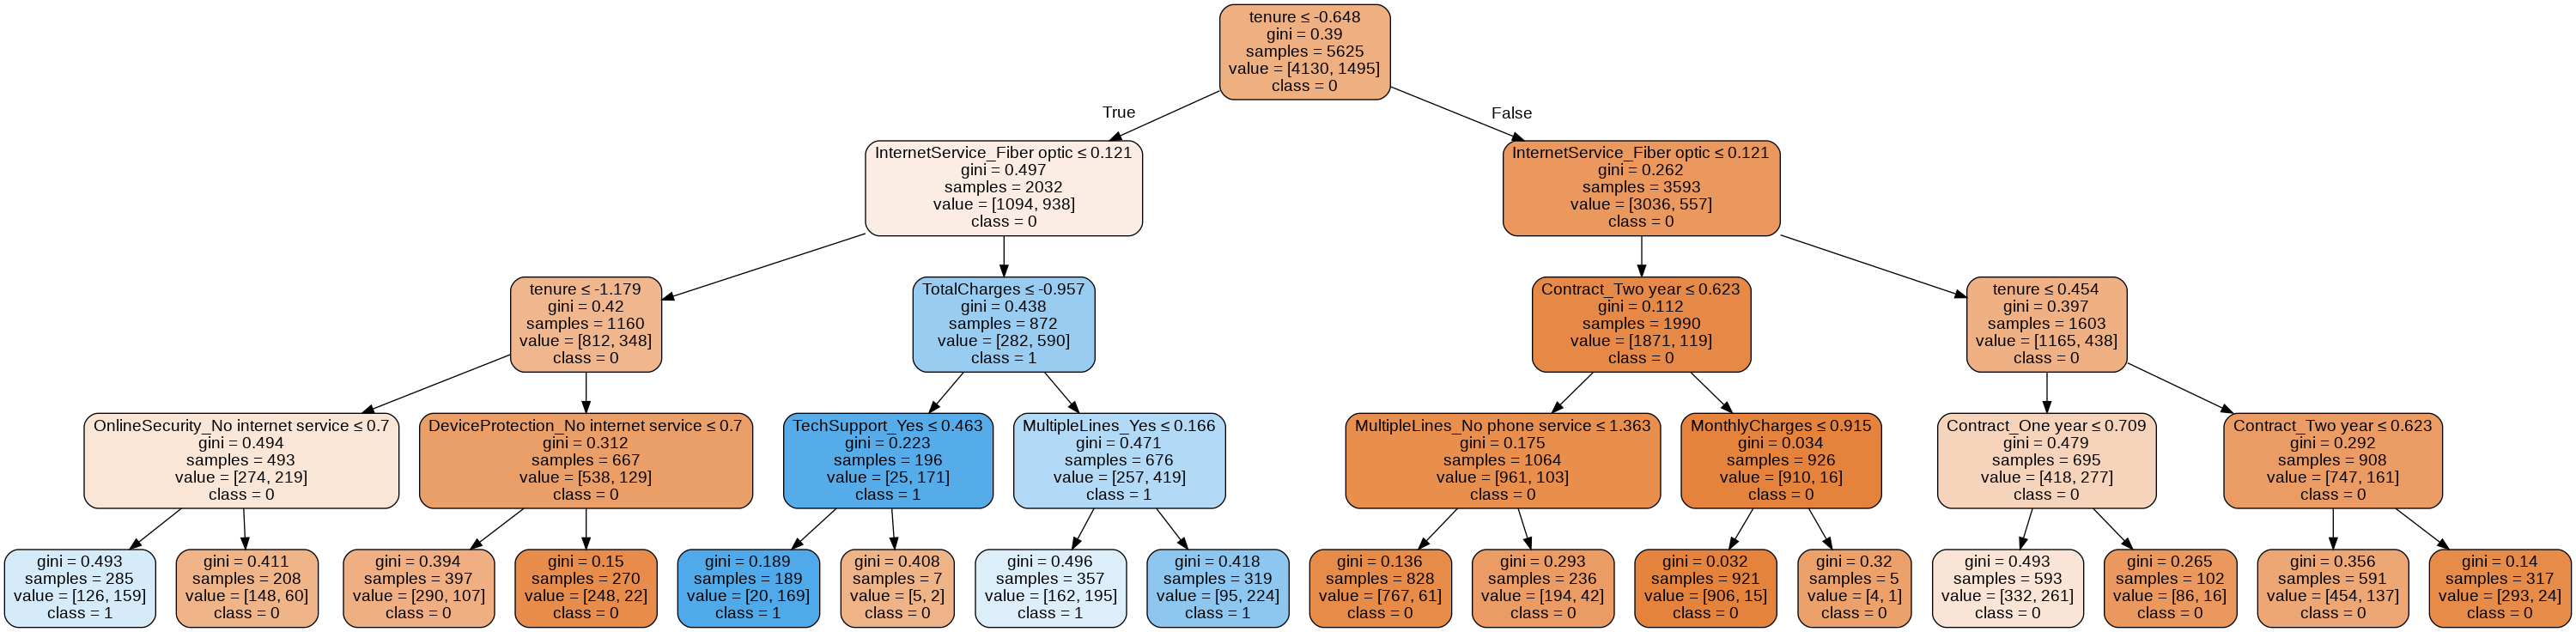

<Figure size 6480x3600 with 0 Axes>

In [927]:
#Function for visualising Trees
from sklearn import tree
from IPython.display import Image 
from io import StringIO
import pydotplus
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    plt.figure(figsize=(90,50))  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

#visualising DTree
plot_decision_tree(classifier_dt,features,target)

**Random Forest**

In [ ]:
#creating Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(criterion='gini',bootstrap=True,
                                     random_state=0,
                                     n_estimators=25,max_depth=6,verbose = 1)
classifier_rf.fit(x_train,y_train)
y_pred_rf=classifier_rf.predict(x_test)
y_trpr_rf=classifier_rf.predict(x_train)




TRAIN SET ACCURACY = 0.8042666666666667 

TEST SET ACCURACY = 0.8002842928216063 

_________________TRAIN SET RandomForest__________________


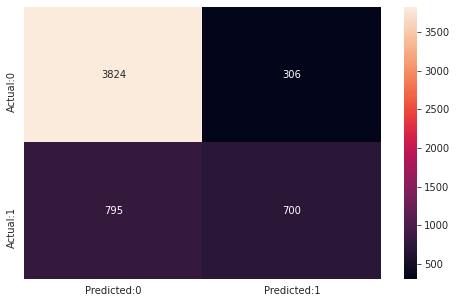

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      4130
           1       0.70      0.47      0.56      1495

    accuracy                           0.80      5625
   macro avg       0.76      0.70      0.72      5625
weighted avg       0.79      0.80      0.79      5625

_________________TEST SET RandomForest__________________


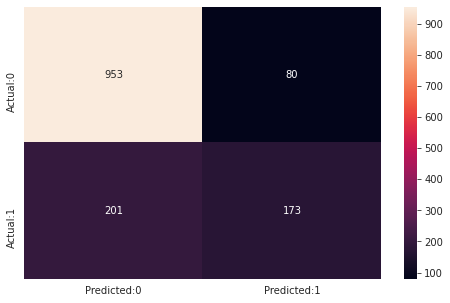

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.68      0.46      0.55       374

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [945]:
print("TRAIN SET ACCURACY =",accuracy_score(y_train, y_trpr_rf),'\n')
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_rf),'\n')

from sklearn.metrics import classification_report, confusion_matrix
print("_________________TRAIN SET RandomForest__________________")
cm=confusion_matrix(y_train, y_trpr_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_train,y_trpr_rf))


print("_________________TEST SET RandomForest__________________")
cm=confusion_matrix(y_test, y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.show()
print(classification_report(y_test,y_pred_rf))

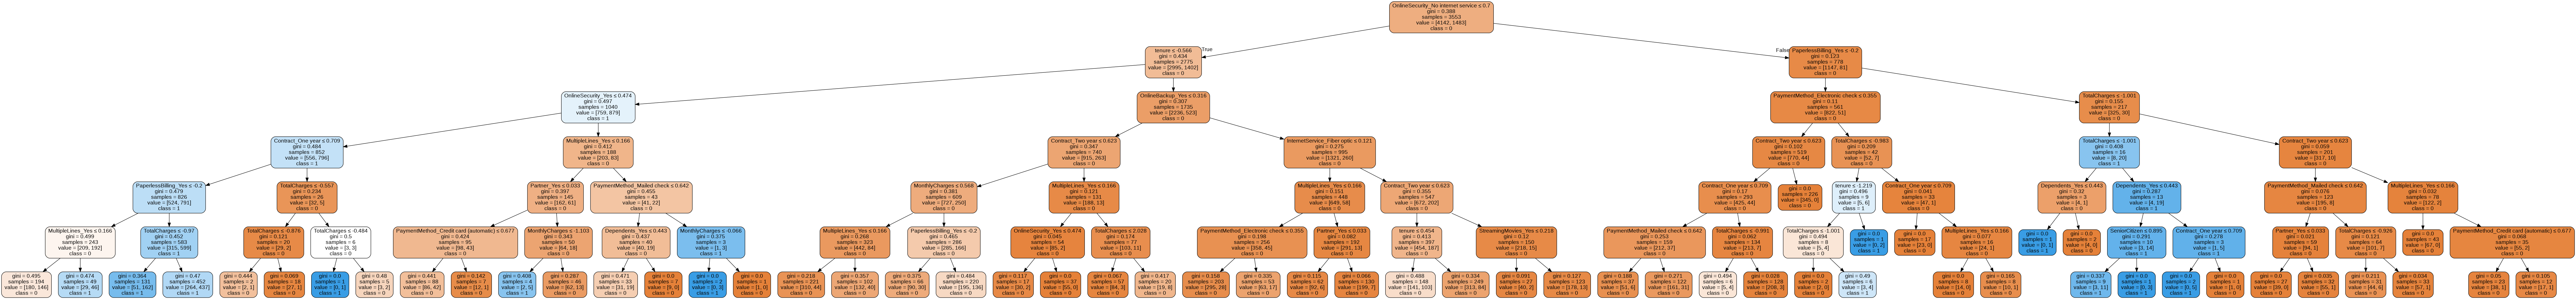

<Figure size 6480x3600 with 0 Axes>

In [930]:
plot_decision_tree(classifier_rf.estimators_[2],features,target)

In [931]:
dataset['Churn']=final['Churn_Yes']
dataset.drop(['gender'],axis=1,inplace=True)

In [932]:
from sklearn.model_selection import train_test_split
x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(dataset.iloc[:,:-1], dataset.iloc[:,-1], test_size = 0.2,random_state = 0)

In [933]:
categorical.remove('Churn')
categorical.remove('gender')

feat=list(x_train_cat.columns)

**CatBoost Model** will also be used because most of the variables in the dataset are Categorical, and it might work better!

In [ ]:
from catboost import CatBoostClassifier
classifier_cat=CatBoostClassifier(iterations=2500,
                           learning_rate=0.005,
                           l2_leaf_reg=0.05,
                           depth=5)

classifier_cat.fit(x_train_cat,y_train_cat,categorical)
y_pred_cat=classifier_cat.predict(x_test_cat)

_________________TRAIN SET CatBoost__________________
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4125
           1       0.71      0.56      0.63      1500

    accuracy                           0.82      5625
   macro avg       0.78      0.74      0.76      5625
weighted avg       0.81      0.82      0.81      5625

_________________TEST SET CatBoost__________________
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1038
           1       0.68      0.53      0.60       369

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



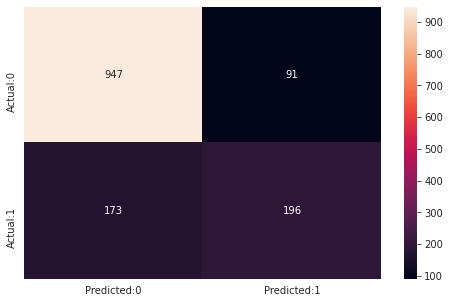

In [935]:
print("_________________TRAIN SET CatBoost__________________")
from sklearn.metrics import classification_report
print(classification_report(y_train_cat,classifier_cat.predict(x_train_cat)))

print("_________________TEST SET CatBoost__________________")
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_cat, y_pred_cat)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
print(classification_report(y_test_cat,y_pred_cat))

Applying **Principal Component Analysis** for Dimensionality Reduction in order to visualize the Dataset on a whole.

In [942]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(x_train)
x=pca.transform(x_test)
comb=pd.DataFrame(x,columns=['0','1','2'])
comb

,0,1,2
0,-1.540719,-2.183685,-2.007797
1,-2.277057,0.369336,-1.354972
2,5.697911,1.412050,-0.048510
3,-1.702693,-0.281658,-1.619081
4,-3.423949,3.195199,-0.191800
...,...,...,...
1402,-0.122009,-1.170192,0.364245
1403,5.553481,1.612893,-0.073212
1404,-2.985000,0.385457,-2.060505
1405,5.854807,1.201009,-0.036471


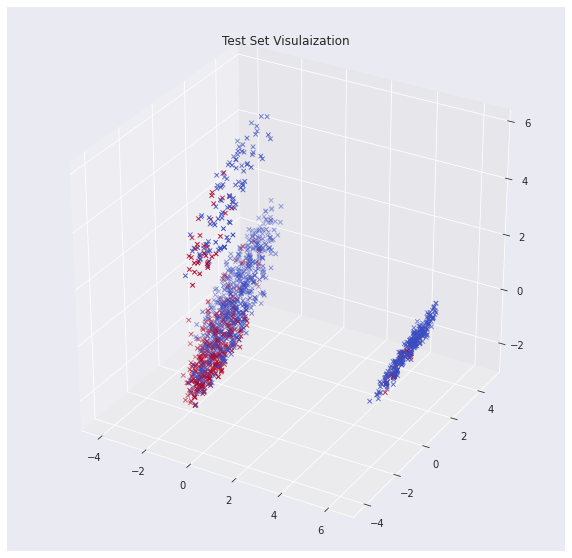

In [943]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
comb=np.array(comb)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(comb[:,0], comb[:,1], comb[:,2], c=y_test, marker='x',
             cmap='coolwarm', linewidth=1)
plt.title('Test Set Visulaization')
plt.show()

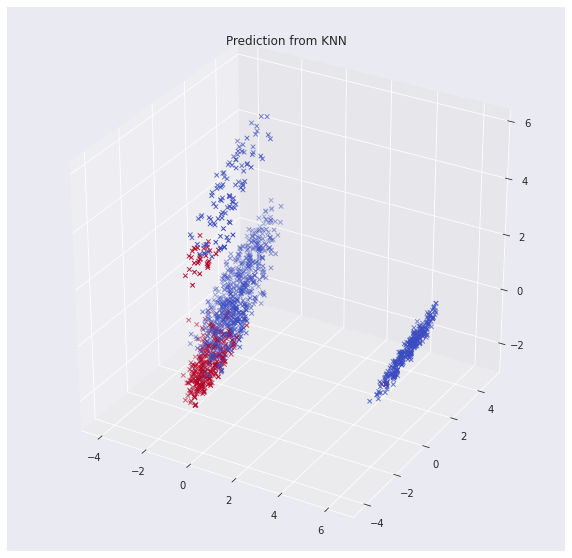

In [944]:
comb=np.array(comb)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(comb[:,0], comb[:,1], comb[:,2], c=y_pred_knn, marker='x',
             cmap='coolwarm', linewidth=1)
plt.title("Prediction from KNN")
plt.show()